<a href="https://colab.research.google.com/github/LinkedInLearning/deep-learning-and-generative-ai-with-python-data-preprocessing-and-analytics-3896069/blob/main/04_02_begin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis

In this section, we will seek to gain insight into the data using visuals such as: Bar charts, Heat maps, histograms, scatter plots, and more.

The exercises for this challenge lab are found in the EDA section.
# EXERCISES  - Under the Exploratory Data Analysis Section
1. Bar Chart - Count how contracts are distributed
2. Pie Chart - Graph contract type by distribution
3. Scatter Chart - Graph Tenure in Months vs. Total Revenue
4. Heat Map - Enter Code to visualize feature relationships
5. Histogram - Graph a histogram of Tenure
6. Simple Feature Engineering - Create the Customer Lifetime Value
7. Save the cleaned file - code provided.

#Load and Explore the Data

In the previous lab, you performed data preprocessing. In this exercise, you perform Exploratory Data Analysis (EDA).

First, upload the cleaned_telecom.csv file.

Next, run all the cells in the **Load and Explore the Data** and in the Data Preprocessing sections. Your hands-on exercise begins in the Data Visualization and Analysis section.




## Step 1. Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib inline
import seaborn as sns


##Step 2. Load Data

In [ ]:
#Load the dataset

df=pd.read_csv('/content/telecom_dataset.csv')


##Step 3. Initial Exploration

#### 3.1 Show first five rows of the DataFrame.

In [ ]:
# Show first five rows

df.head()

### 3.2 Show the last five rows of the DataFrame

In [ ]:
df.tail()

### 3.3 Show information about the Data



In [ ]:
df.info()

#### 3.3.1 NEW: Let's add code to convert the column names to lowercase

In [ ]:
# Convert column names to lowercase
df.columns = df.columns.str.lower()

#Replace Spaces with Underscores
df.columns = df.columns.str.replace(' ', '_')


#### 3.3.2 NEW: Let's add code to replace spaces with underscores.

In [ ]:
# Replaces spaces with underscores.

df.rename(columns=lambda x: x.replace(' ', '_'), inplace=True)

df.info()

### 3.4 Show the DataFrame shape

The .shape() method gives you the number of rows and columns in the dataset. You can also see this information in the df.info() output.

In [ ]:
df.shape

### 3.5 Show the data types

Show DataFrame data types. Although the df.info() provides this information, it is good to see the column datatypes on their own.

In [ ]:
df.dtypes

### 3.6 Show DataFrame statistics

The describe() method computes and displays summary statistics for the dataset.

In [ ]:
df.describe()

Below is bar charts that plots the distribution of each numerical column.

In [ ]:
# Extracting numerical columns
numeric_columns = df.columns[ df.dtypes!='object']

# Plotting the distribution of each numerical column
for col in numeric_columns:
  plt.hist(df[col])
  plt.xlabel(col)
  plt.ylabel('Frequency')
  plt.title(f'Distribution of {col}')
  plt.show()

### 3.7 Check for duplicate values

Checking for duplicates helps identify rows that are exact copies of others. These duplicates can arise from data entry errors, merging datasets, or repeated measurements.

In [ ]:
df.duplicated().sum()

### 3.8 Check for Missing (Null) Values

You probably saw null values in the a column when your reviewed the df.info() output. Here is the .isnull() method, which shows you any null values in the dataset as well.

In [ ]:
df.isnull().sum()

#### 3.8.1 Visualize the missing values

In [ ]:
# Add the msno library to visualize the missing values

import missingno as msno

msno.bar(df)

### 3.9 Check for Unique Values

Show unique values in a few columns with the highest missing values - just for curiosity.


---





In [ ]:
# Get unique values for a specific column
print("Unique values in 'offer':", df['offer'].unique())

What does this all mean?

* nan: Represents missing values in the 'Offer' column. It indicates that there are entries in this column where the data is missing.
* 'Offer E', 'Offer D', 'Offer A', 'Offer B', 'Offer C': These are the unique non-missing values present in the 'Offer' column. Each represents a different offer.

Next Steps? We'll need to handle these data quality issues in the data preprocessing section!



In [ ]:
# Get the count of unique values for each column
unique_counts = df.nunique()

print("Count of Unique Values for Each Column:\n", unique_counts)

### 3.10 Initial Check for Outliers

On a column



In [ ]:
# Create a box plot
plt.boxplot(df['age'])
plt.title('Box Plot of Age')
plt.ylabel('Age')
plt.show()

# Data Preprocessing

## Step 1.  Handle Missing Values

Data Understanding:

Note:  We have made this dataset intentionally "messy" when it comes to missing values. Before filling missing values, understand why data might be missing and whether imputation could bias your analyses.


**Methods**

Use methods such as mean/median imputation, forward/backward fill, or dropping missing values depending on the context.

In [ ]:
# Let's see information on the DataFrame again.
# Total row count is 7,043.
# Note both objects, integers, and floats have missing values.

df.info()

Let's show the number of missing values for numbers and objects.

In [ ]:
# Calculate missing values for numeric and object columns
missing_values_numeric = df.select_dtypes(include=['number']).isnull().sum()
missing_values_object = df.select_dtypes(include=['object']).isnull().sum()

# Display the results
print("Missing values in numeric columns:")
print(missing_values_numeric)
print("\nMissing values in object columns:")
print(missing_values_object)

In [ ]:
# Put the columns that need to be filled in.

categorical_columns = ['multiple_lines',
       'internet_service', 'internet_type', 'online_security', 'online_backup',
       'device_protection_plan', 'premium_tech_support', 'streaming_tv',
       'streaming_movies', 'unlimited_data']

for column in categorical_columns:
    df[column].fillna(df[column].mode()[0], inplace=True)  # mode()[0] to get the most common value



In [ ]:
df.info()

Looks like we missed two objects with missing values: "offer" and "payment_method". We also still have to numeric features with missing values: "gigabits_used" and "income".

EXERCISE: offer and payment_method.

In [ ]:
# This takes care of the object columns.

# Define the values to fill for each column
fill_values = {'offer': 'None', 'payment_method': 'Credit Card'}

# Fill missing values
df.fillna(fill_values, inplace=True)

In [ ]:
# This takes care of the numeric columns.

# Calculate the mean for each column
mean_gigabits = df['gigabits_used'].mean()
mean_income = df['income'].mean()

# Fill missing values with the calculated means
df['gigabits_used'].fillna(mean_gigabits, inplace=True)
df['income'].fillna(mean_income, inplace=True)

In [ ]:
# Run this cell to confirm that all missing values are filled.

df.info()

## Step 2. No duplicate values

In [ ]:
df.duplicated().sum()

0

## Step 3. Handle Data Type Inconsistency

Convert columns to appropriate data types using methods like astype() in Pandas.


Zip Code has the incorrect data type. It is shown as an integer - it is not a number. In data processing and analytics, zip codes are often not treated as integers or numeric values, even though they consist of digits. See the course lesson on why this is the case.

In [ ]:
# Enter the code to convert the 'zip_code" column to an object (string)

df['zip_code'] = df['zip_code'].astype(str)

# Enter the code to check the data type of the zip code column

print(df['zip_code'].dtype)

## Step 4. Handle Outliers

An outlier is a data point in a data set that is distant from all other observations. A data point that lies outside the overall distribution of the dataset. Z score is an important concept in statistics. Z score is also called standard score. This score helps to understand if a data value is greater or smaller than mean and how far away it is from the mean. More specifically, Z score tells how many standard deviations away a data point is from the mean.

The results below are from our initial data check.

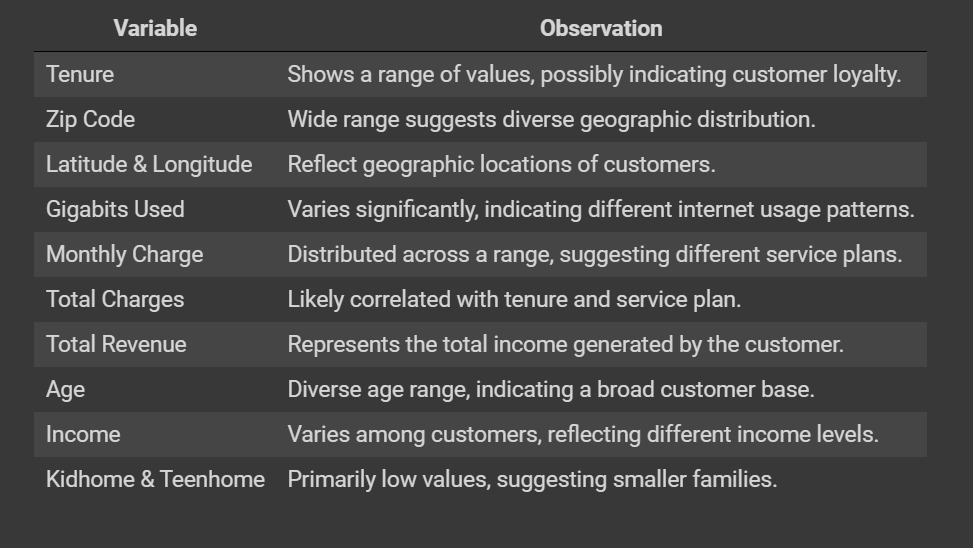

Let's create a z-score for the total revenue column, since it is one of the features that we'll need to calculate Customer Lifetime Value.

In [ ]:
# Create a z-score for the column 'total_revenue'

from scipy import stats # SciPy is a widely-used library for scientific and technical computing in Python. The stats module within SciPy contains a wide range of statistical functions, probability distribu

z_scores = stats.zscore(df['total_revenue'])

# Display the z-scores
z_scores

Check the rows with a z-score over 3. If there are rows with a z-score we can drop them. (Ektamaini, 2020) https://www.geeksforgeeks.org/z-score-for-outlier-detection-python/


In [ ]:
# Check rows with a z-score over 3. A z-score A Z-score, also known as a standard score, measures how many standard deviations a data point is from the mean of the dataset. It is a way to standardize data points within a distribution, allowing for comparison across different scales or distributions.

df[(z_scores > 3)]

There are five rows with a z-score over 3.

In [ ]:
# Remove any rows with a z-score over 3 (keep rows with a z-score <3

df = df[(z_scores < 3)]


Let's check again - for rows with a z-score over 3.

In [ ]:
# Check rows with a z-score over 3. A z-score A Z-score, also known as a standard score, measures how many standard deviations a data point is from the mean of the dataset. It is a way to standardize data points within a distribution, allowing for comparison across different scales or distributions.

df[(z_scores > 3)]

No rows with a z-score over three.

In [ ]:
# Create a z-score for the column 'tenure'

from scipy import stats

z_scores = stats.zscore(df['tenure'])

# Display the z-scores
z_scores

In [ ]:
# Tenure appears to not have any outliers.

# Check rows with a z-score over 3.

df[(z_scores > 3)]

## Step 5. Encode Categorical Values

Note: After one-hot encoding, the object fields turn into integers. See the course here for more information about one-hot encoding (or encoding categorical values).

In [ ]:
categorical_columns = df.select_dtypes(include=['object']).columns
print(categorical_columns)

In [ ]:
#NOTE: Do not include zip code. We will need Zip Code for EDA and clustering analysis.

from sklearn.preprocessing import LabelEncoder

categorical_columns = ['customer_id', 'city', 'offer', 'phone_service',
       'multiple_lines', 'internet_service', 'internet_type',
       'online_security', 'online_backup', 'device_protection_plan',
       'premium_tech_support', 'streaming_tv', 'streaming_movies',
       'unlimited_data', 'contract', 'payment_method', 'gender', 'married',
       'churn']

#--------------------------------------------------------------------------
# EXERCISE STARTS HERE #

# Enter the code to apply label encoding

# Apply label encoding
le = LabelEncoder()
for col in categorical_columns:
    df[col] = le.fit_transform(df[col].astype(str))






In [ ]:
# Verify data types adter encodiing
df.dtypes

In [ ]:
df.head()

## Step 6. Save the processed file

In [ ]:
# Save the clean file. We'll use it now for Data visualizaition and analytics.

df.to_csv('cleaned_telecom.csv', index=False)


# Exploratory Data Analysis

# EXERCISE #1


In [ ]:
# Load the Dataset

cleaned_df=pd.read_csv('/content/cleaned_telecom.csv')

In [ ]:
cleaned_df.head()

In [ ]:
cleaned_df.info()

## Bar Chart

Count how contracts are distributed.

In [ ]:
# Bar Plot

# EXERCISE #1
#------------------------------------------------------------------






Count the frequency of each contract.

In [ ]:
# Mapping numeric values to contract type labels
contract_mapping = {0: 'Month-to-Month', 1: 'One Year', 2: 'Two Year'}
df['contract'] = df['contract'].map(contract_mapping)

# Count the frequencies of each contract type
contract_counts = df['contract'].value_counts()

# Labels for the contract types
labels = contract_counts.index

# Create the bar chart
plt.figure(figsize=(10, 6))
plt.bar(labels, contract_counts, color=['#66b3ff', '#99ff99', '#ffcc99'])
plt.xlabel("Contract Type")
plt.ylabel("Count")
plt.title("Contract Type Distribution")
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.show()

Distribution of Payment Methods

In [ ]:
# Let's examine the payment methods and their frequencies by improving the plot.

# Payment methods and their frequencies
payment_methods = [0, 1, 2]
frequencies = [4000, 3000, 500]
labels = ['Credit Card', 'Bank Withdrawal', 'Mailed Check']  # Labels corresponding to the numeric values

# Create the bar plot
plt.bar(payment_methods, frequencies, tick_label=labels)  # Assign labels to bars

# Add labels and title
plt.xlabel("Payment Method")
plt.ylabel("Frequency")
plt.title("Distribution of Payment Methods")

# Show the plot
plt.show()

## Pie Chart

Contract type distribution in a Pie Chart.

In [ ]:
# Pie Chart

# EXERCISE #2
#------------------------------------------------------------------






## Scatter Plot

Tenure in Months vs. Total Revenue

In [ ]:
# Scatter Plot

# EXERCISE #3
#------------------------------------------------------------------





## Heat Map

Here, we do two things in one code cell. We calculate the correlation matrix and print it so that you can see the numeric values in rows and columns. To visualize these numbers, we use Seaborn.

In [ ]:
# Calculate the correlation matrix
correlation_matrix = cleaned_df.corr()

# Display the correlation matrix
print(correlation_matrix)

# Visualize the correlation matrix

#------------------------------------------------------------------
# EXERCISE #4
# Enter code to visualize the correlation matrix.








Show the more meaningful relationships.

In [ ]:
# Calculate the correlation matrix
corr = cleaned_df.corr()

plt.figure(figsize=(20, 15))  # Adjust the size as needed
sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.7)],
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 10}, square=True)
plt.tight_layout()
plt.show()

## Histogram

Histogram of Monthly Charges

In [ ]:
# Histogram  with KDE
plt.figure(figsize=(10, 6))
sns.histplot(df['monthly_charge'], kde=True)
plt.title('Distribution of Monthly Charges')
plt.xlabel('Monthly Charges')
plt.ylabel('Frequency')
plt.show()

Histogram of Tenure

In [ ]:
# Histogram of Tenure

# EXERCISE #5
#------------------------------------------------------------------






Distribution plot of revenue

In [ ]:
# Distribution Plot

# It is used basically for univariant set of observations and visualizes it through a histogram i.e. only one observation
# and hence you choose one particular column of the dataset.
sns.displot(cleaned_df['total_revenue'])

Churn Distribution

In [ ]:
# Count Plot
plt.figure(figsize=(10, 6))
sns.countplot(x='churn', data=df)
plt.title('Churn Distribution')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

# Simple Feature Engineering

Create new features or transform existing ones to enhance the dataset’s predictive power.

Customer Lifetime Value is a new feature - Total Revenue * Tenure.

## Customer Lifetime Value

In [ ]:
# Simple Feature Engineering

# Assuming CLV can be approximated as Total Revenue * Tenure for simplicity
cleaned_df['CLV'] = cleaned_df['total_revenue'] * cleaned_df['tenure']

# Drop the Total Revenue and Tenure columns as they are now part of CLV

# EXERCISE #6
#------------------------------------------------------------------





In [ ]:
# Note that 30 columns are showing now and that CLV is now a feature - at the very end.

cleaned_df.info()


## Total Services Used

In [ ]:
# Total Services Used
cleaned_df['total_services_used'] = (cleaned_df['phone_service'] + cleaned_df['internet_service'] + cleaned_df['streaming_tv'] + cleaned_df['streaming_movies'] +
                             cleaned_df['online_security'] + cleaned_df['online_backup'] + cleaned_df['device_protection_plan'] + cleaned_df['premium_tech_support'])


In [ ]:
# Total Services Used is now a new feature at the very end of the list.

cleaned_df.info()

### SAVE the cleaned file: Run the Cell to save the cleaned file.

In [ ]:
# Save the clean file. We'll use it now for Data visualizaition and analytics.

df.to_csv('eda_telecom.csv', index=False)
